In [32]:
import pandas as pd

# load original cleaned dataset
data = pd.read_csv("customer_churn_cleaned.csv")

print(data.head())
print(data.info())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

  MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0            No             DSL             No  ...               No   
1            No             DSL            Yes  ...              Yes   
2            No             DSL            Yes  ...               No   
3            No             DSL            Yes  ...              Yes   
4            No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0       

In [33]:
data["TotalCharges"] = data["TotalCharges"].fillna(0)


In [34]:
if "customerID" in data.columns:
    data = data.drop("customerID", axis=1)


In [35]:
yes_no_cols = [
    "Partner", "Dependents", "PhoneService", "PaperlessBilling",
    "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies", "Churn"
]

for col in yes_no_cols:
    if col in data.columns:
        data[col] = data[col].astype(str).replace({
            "Yes": 1,
            "No": 0,
            "No internet service": 0,
            "No phone service": 0
        })


/tmp/ipython-input-3428890488.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].astype(str).replace({
/tmp/ipython-input-3428890488.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].astype(str).replace({
/tmp/ipython-input-3428890488.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_

In [36]:
data[yes_no_cols].head()


,Partner,Dependents,PhoneService,PaperlessBilling,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,1,0,0,1,0,1,0,0,0,0,0
1,0,0,1,0,1,0,1,0,0,0,0
2,0,0,1,1,1,1,0,0,0,0,1
3,0,0,0,0,1,0,1,1,0,0,0
4,0,0,1,1,0,0,0,0,0,0,1


In [37]:
import numpy as np

# AvgMonthlySpend
data["AvgMonthlySpend"] = np.where(
    data["tenure"] == 0,
    0,
    data["TotalCharges"] / data["tenure"]
)

# Tenure bucket
def tenure_bucket(x):
    if x <= 12:
        return "0-12"
    elif x <= 24:
        return "13-24"
    elif x <= 48:
        return "25-48"
    else:
        return "49+"

data["TenureCategory"] = data["tenure"].apply(tenure_bucket)

# Contract simplified category
def contract_type(x):
    if x == "Month-to-month":
        return "ShortTerm"
    elif x == "One year":
        return "MidTerm"
    else:
        return "LongTerm"

data["ContractTypeSimple"] = data["Contract"].apply(contract_type)

data[["tenure", "AvgMonthlySpend", "TenureCategory", "ContractTypeSimple"]].head()


,tenure,AvgMonthlySpend,TenureCategory,ContractTypeSimple
0,1,29.850000,0-12,ShortTerm
1,34,55.573529,25-48,MidTerm
2,2,54.075000,0-12,ShortTerm
3,45,40.905556,25-48,MidTerm
4,2,75.825000,0-12,ShortTerm


In [39]:
# Step 5 — One-Hot Encoding of non-numeric columns
cat_cols = data.select_dtypes(include=["object"]).columns
print("Categorical columns:", list(cat_cols))

data_encoded = pd.get_dummies(data, columns=cat_cols, drop_first=True)

print("Shape after encoding:", data_encoded.shape)
data_encoded.head()


Categorical columns: ['gender', 'MultipleLines', 'InternetService', 'Contract', 'PaymentMethod', 'TenureCategory', 'ContractTypeSimple']
Shape after encoding: (7043, 30)


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureCategory_13-24,TenureCategory_25-48,TenureCategory_49+,ContractTypeSimple_MidTerm,ContractTypeSimple_ShortTerm
0,0,1,0,1,0,0,1,0,0,0,...,False,False,False,True,False,False,False,False,False,True
1,0,0,0,34,1,1,0,1,0,0,...,True,False,False,False,True,False,True,False,True,False
2,0,0,0,2,1,1,1,0,0,0,...,False,False,False,False,True,False,False,False,False,True
3,0,0,0,45,0,1,0,1,1,0,...,True,False,False,False,False,False,True,False,True,False
4,0,0,0,2,1,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,True


In [40]:
X = data_encoded.drop("Churn", axis=1)
y = data_encoded["Churn"]

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (7043, 29)
Target shape: (7043,)


In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train:", X_train.shape)
print("Test:", X_test.shape)



Train: (5634, 29)
Test: (1409, 29)


In [42]:
from sklearn.preprocessing import StandardScaler

num_cols = [col for col in ["tenure", "MonthlyCharges", "TotalCharges", "AvgMonthlySpend"] if col in X_train.columns]

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

print("\nAUC-ROC Score:\n")
print(roc_auc_score(y_test, y_proba))



Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409


Confusion Matrix:

[[931 104]
 [181 193]]

AUC-ROC Score:

0.8424810767521764


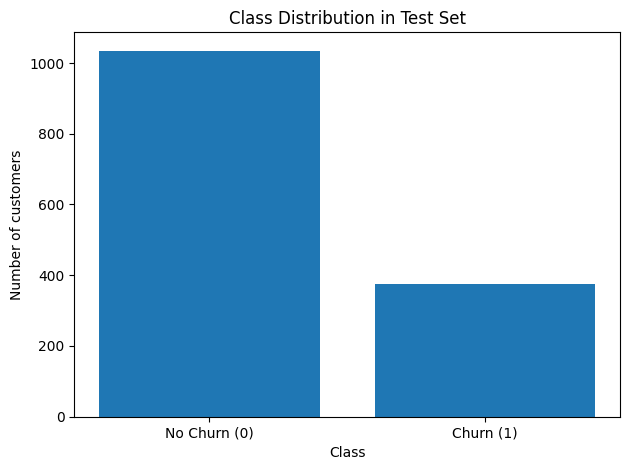

In [45]:
import matplotlib.pyplot as plt

# counts from your test set metrics
no_churn = 1035
churn = 374

plt.figure()
plt.bar(['No Churn (0)', 'Churn (1)'], [no_churn, churn])
plt.title("Class Distribution in Test Set")
plt.xlabel("Class")
plt.ylabel("Number of customers")
plt.tight_layout()
plt.savefig("class_distribution.png", dpi=300)
plt.show()


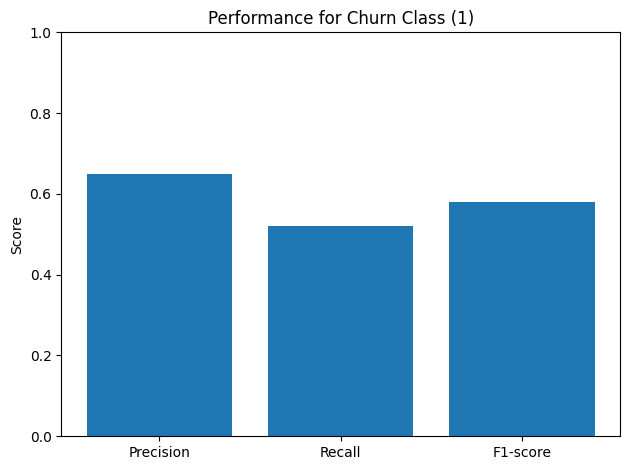

In [46]:
precision_churn = 0.65
recall_churn = 0.52
f1_churn = 0.58

plt.figure()
plt.bar(['Precision', 'Recall', 'F1-score'],
        [precision_churn, recall_churn, f1_churn])
plt.ylim(0, 1)
plt.title("Performance for Churn Class (1)")
plt.ylabel("Score")
plt.tight_layout()
plt.savefig("churn_metrics.png", dpi=300)
plt.show()


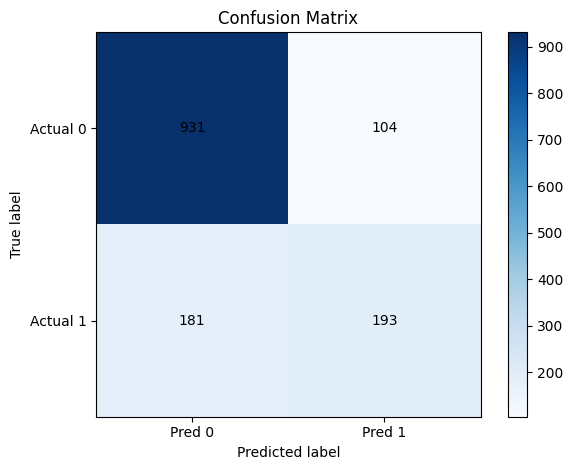

In [47]:
import numpy as np
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Pred 0', 'Pred 1'])
plt.yticks(tick_marks, ['Actual 0', 'Actual 1'])

# print numbers on boxes
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j],
                 ha="center", va="center", color="black")

plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.savefig("confusion_matrix.png", dpi=300)
plt.show()


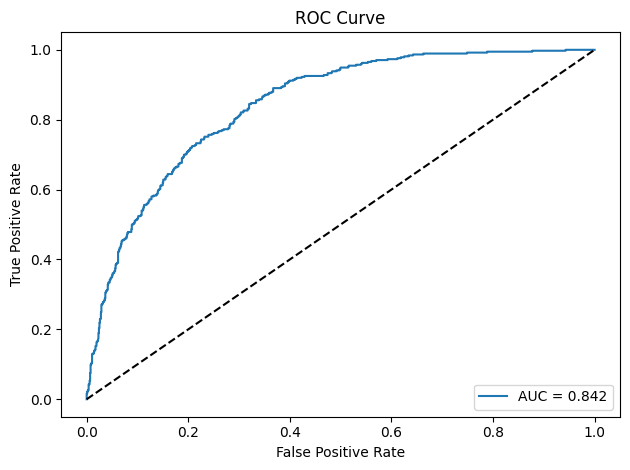

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("roc_curve.png", dpi=300)
plt.show()
